In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BostonHousing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


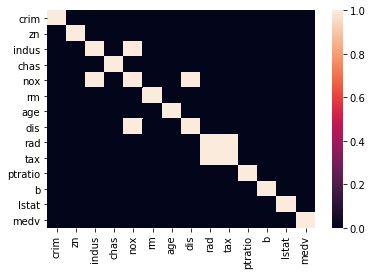

In [5]:
sns.heatmap(np.abs(df.corr()) > 0.75)

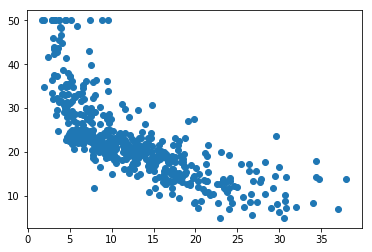

In [6]:
plt.scatter(df['lstat'], df['medv'])

In [7]:
df[['rm', 'medv']].corr()

,rm,medv
rm,1.00000,0.69536
medv,0.69536,1.00000


There looks to be a positive relationship between rooms and medv.  This can be seen by the scatter plot and the correlation of 0.695. 


In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
linreg = LinearRegression()
linreg.fit(df.drop('medv', axis = 1), df['medv'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
linreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(df.drop('medv', axis = 1))

In [13]:
linreg.fit(scaled_data, df['medv'])
linreg.coef_

array([ -9.60975755,   4.64204584,   0.56083933,   2.68673382,
        -8.63457306,  19.88368651,   0.06721501, -16.22666104,
         7.03913802,  -6.46332721,  -8.95582398,   3.69282735,
       -19.01724361])

In [14]:
(linreg.coef_[0] - df['crim'].min()) / (df['crim'].max() - df['crim'].min())

-0.10808239311300483

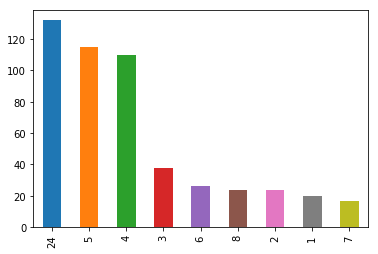

In [15]:
df['rad'].value_counts().plot(kind = 'bar')

In [16]:
pd.get_dummies(df['rad'])

,1,2,3,4,5,6,7,8,24
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0


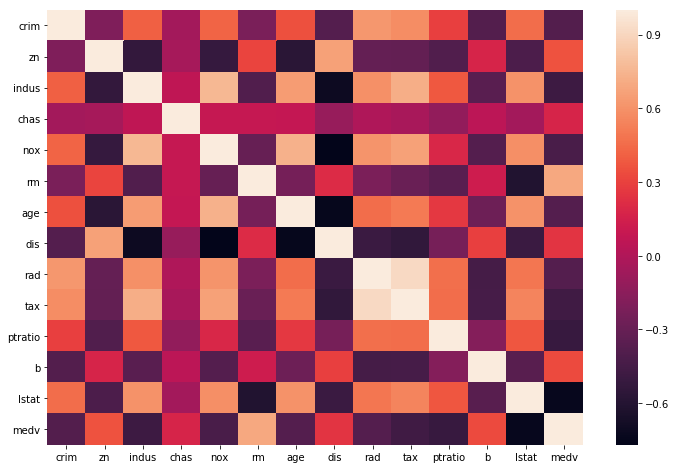

In [17]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr())

In [18]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
df.corr() > .75

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,True,False,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,True,False,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,True,False,True,False,False,False,False,False,False,False,False,False
chas,False,False,False,True,False,False,False,False,False,False,False,False,False,False
nox,False,False,True,False,True,False,False,False,False,False,False,False,False,False
rm,False,False,False,False,False,True,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,True,False,False,False,False,False,False,False
dis,False,False,False,False,False,False,False,True,False,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,True,True,False,False,False,False
tax,False,False,False,False,False,False,False,False,True,True,False,False,False,False


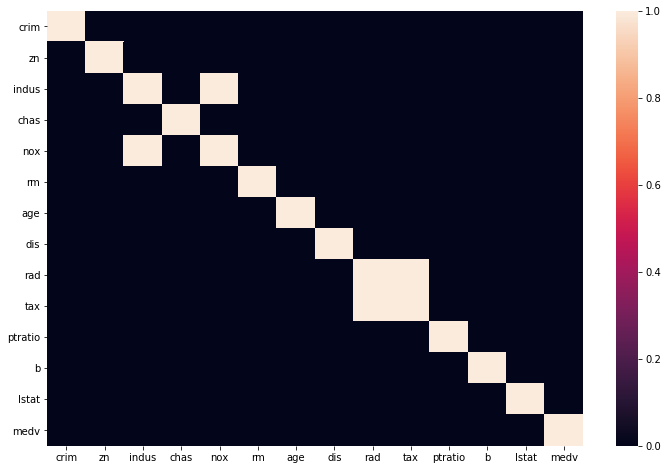

In [20]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr() > .75)

## Normalizing - changes the shape of your data

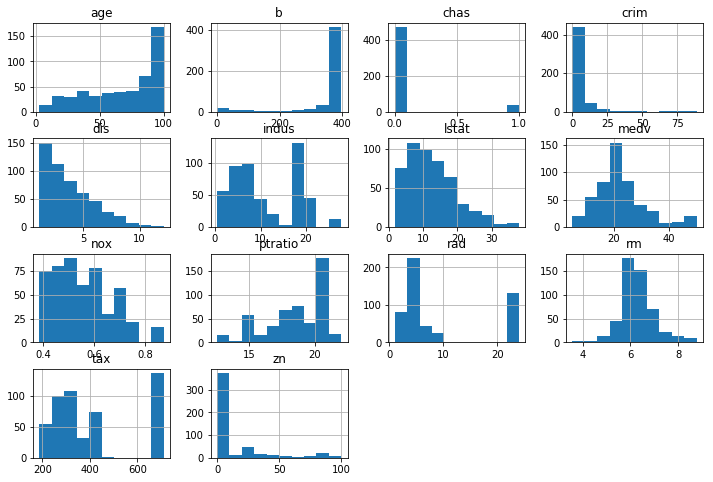

In [21]:
df.hist(figsize = (12, 8))
plt.show()

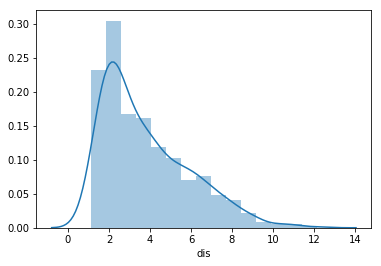

In [22]:
sns.distplot(df['dis'])

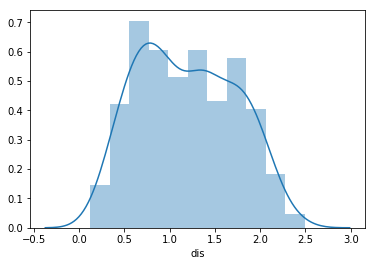

In [23]:
sns.distplot(np.log(df['dis']))

Text(0.5, 1.0, 'Log Transformed Data')

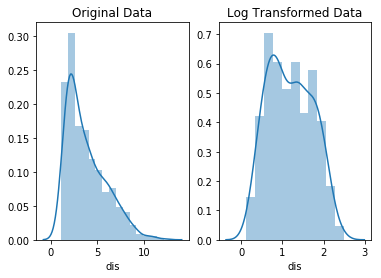

In [24]:
ax1 = plt.subplot(1, 2, 1)
sns.distplot(df['dis'])
ax1.set_title('Original Data')


ax2 = plt.subplot(1, 2, 2)
sns.distplot(np.log(df['dis']))
ax2.set_title('Log Transformed Data')

## Original Dis Variable

In [25]:
model = smf.ols(formula = 'medv~dis', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.21e-08
Time:                        10:03:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

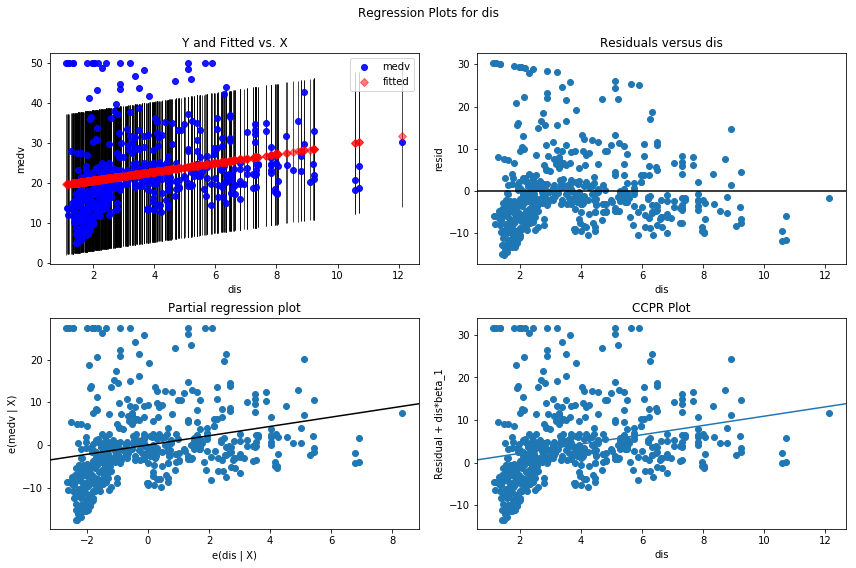

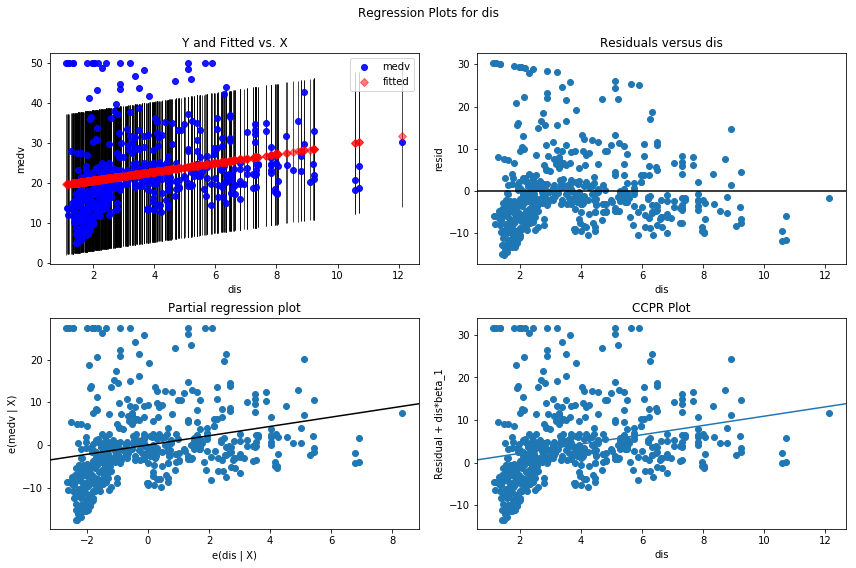

In [26]:
fig = plt.figure(figsize = (12, 8))
sm.graphics.plot_regress_exog(model, 'dis', fig = fig)

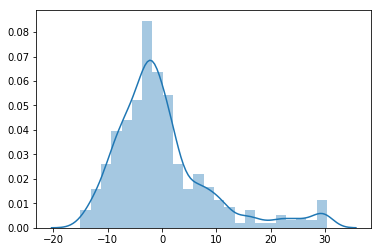

In [27]:
sns.distplot(model.resid)

## Regression Model with Log_Dis instead of Dis

In [28]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
df['log_dis'] = np.log(df['dis'])

In [30]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073


In [31]:
model_log_dis = smf.ols(formula = 'medv~log_dis', data = df).fit()
model_log_dis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           2.00e-11
Time:                        10:03:21   Log-Likelihood:                -1817.6
No. Observations:                 506   AIC:                             3639.
Df Residuals:                     504   BIC:                             3648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6131      0.947     17.537      0.000      14.752      18.474
log_dis        4.9828      0.726      6.862      0.000       3.556       6.409
==============================================================================
Omnibus:                      161.692   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.821
Skew:                           1.620   Prob(JB):                     4.57e-89
Kurtosis:                       5.967   Cond. No.                         4.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

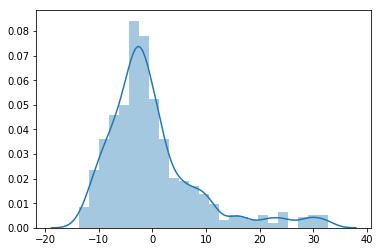

In [32]:
sns.distplot(model_log_dis.resid)

https://www.youtube.com/watch?v=95mcPn1LpNk

- No log transformation: The model predicts when dis increases by 1 the MEDV increases by 1.0916
- Log transformation on independent variable: The model predicts when dis increases by 1% the MEDV increases by 4.9828/100

In [33]:
4.9828/100

0.049828000000000004

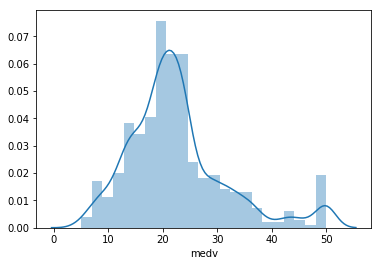

In [34]:
sns.distplot(df['medv'])

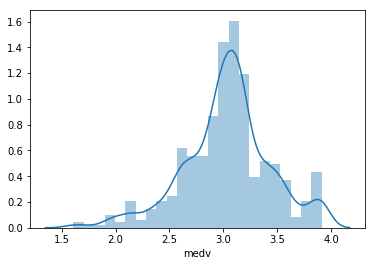

In [35]:
sns.distplot(np.log(df['medv']))

In [36]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073


In [37]:
df['log_medv'] = np.log(df['medv'])

In [38]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis,log_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073,3.589059


In [39]:
model_logs = smf.ols(formula = 'log_medv~log_dis', data = df).fit()
model_logs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_medv   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     99.31
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.80e-21
Time:                        10:03:26   Log-Likelihood:                -219.29
No. Observations:                 506   AIC:                             442.6
Df Residuals:                     504   BIC:                             451.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6693      0.040     66.338      0.000       2.590       2.748
log_dis        0.3074      0.031      9.965      0.000       0.247       0.368
==============================================================================
Omnibus:                       26.553   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.465
Skew:                           0.378   Prob(JB):                     3.65e-10
Kurtosis:                       4.221   Cond. No.                         4.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

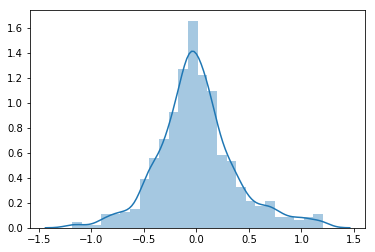

In [40]:
sns.distplot(model_logs.resid)

The model predicts that a 1% increase in dis leads to an increase in the medv by 0.3074%

## Scaling - transforming data so it fits within a specific scale 

In [41]:
df['dis']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
5      6.0622
6      5.5605
7      5.9505
8      6.0821
9      6.5921
10     6.3467
11     6.2267
12     5.4509
13     4.7075
14     4.4619
15     4.4986
16     4.4986
17     4.2579
18     3.7965
19     3.7965
20     3.7979
21     4.0123
22     3.9769
23     4.0952
24     4.3996
25     4.4546
26     4.6820
27     4.4534
28     4.4547
29     4.2390
        ...  
476    2.3053
477    2.1007
478    2.1705
479    1.9512
480    3.4242
481    3.3317
482    3.4106
483    4.0983
484    3.7240
485    3.9917
486    3.5459
487    3.1523
488    1.8209
489    1.7554
490    1.8226
491    1.8681
492    2.1099
493    2.3817
494    2.3817
495    2.7986
496    2.7986
497    2.8927
498    2.4091
499    2.3999
500    2.4982
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: dis, Length: 506, dtype: float64

In [42]:
df['dis'].values.reshape(-1, 1).shape

(506, 1)

In [43]:
scaler = MinMaxScaler()
scaler.fit(df['dis'].values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [44]:
scaled_data = scaler.transform(df['dis'].values.reshape(-1, 1))

Text(0.5, 1.0, 'Scaled Data')

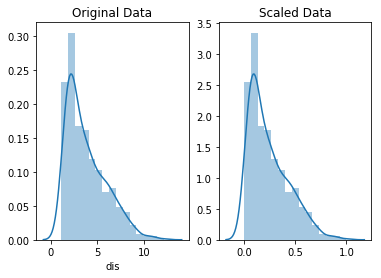

In [45]:
ax1 = plt.subplot(1, 2, 1)
sns.distplot(df['dis'])
ax1.set_title('Original Data')


ax2 = plt.subplot(1, 2, 2)
sns.distplot(scaled_data)
ax2.set_title('Scaled Data')

In [46]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis,log_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073,3.589059


In [47]:
model = smf.ols(formula = 'medv~b+rm', data = df).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.47e-86
Time:                        10:03:31   Log-Likelihood:                -1641.4
No. Observations:                 506   AIC:                             3289.
Df Residuals:                     503   BIC:                             3302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.9811      2.608    -15.713      0.000     -46.105     -35.857
b              0.0250      0.003      8.187      0.000       0.019       0.031
rm             8.6856      0.397     21.862      0.000       7.905       9.466
==============================================================================
Omnibus:                      158.364   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1053.751
Skew:                           1.190   Prob(JB):                    1.52e-229
Kurtosis:                       9.657   Cond. No.                     3.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- RM: 8.68
- b: 0.025

- If scaled - You can the importance of the features.  RM is more important than b on MEDV
- If not scaled - You can get the impact on the target variable.  When you increase RM by 1, the target variable increases by 8.68.  When you increases b by 1, the target variable increase by 0.025

- The model predicts that a 1 unit increase in b leads to an increase in MEDV by 0.025
- The model predicts that a 1 unit increase in rm leads to an increase in MEDV by 8.69

In [49]:
# Scale RM
scaler.fit(df['rm'].values.reshape(-1, 1))
df['scaled_rm'] = scaler.transform(df['rm'].values.reshape(-1, 1))

# scale b
scaler.fit(df['b'].values.reshape(-1, 1))
df['scaled_b'] = scaler.transform(df['b'].values.reshape(-1, 1))

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis,log_medv,scaled_rm,scaled_b
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545,3.178054,0.577505,1.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836,3.072693,0.547998,1.000000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836,3.546740,0.694386,0.989737
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073,3.508556,0.658555,0.994276
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073,3.589059,0.687105,1.000000


In [50]:
model = smf.ols(formula = 'medv~scaled_b+scaled_rm', data = df).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           1.47e-86
Time:                        10:03:33   Log-Likelihood:                -1641.4
No. Observations:                 506   AIC:                             3289.
Df Residuals:                     503   BIC:                             3302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0438      1.460     -6.878      0.000     -12.913      -7.175
scaled_b       9.9273      1.213      8.187      0.000       7.545      12.310
scaled_rm     45.3299      2.073     21.862      0.000      41.256      49.404
==============================================================================
Omnibus:                      158.364   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1053.751
Skew:                           1.190   Prob(JB):                    1.52e-229
Kurtosis:                       9.657   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,log_dis,log_medv,scaled_rm,scaled_b
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.408545,3.178054,0.577505,1.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.602836,3.072693,0.547998,1.000000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.602836,3.546740,0.694386,0.989737
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.802073,3.508556,0.658555,0.994276
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.802073,3.589059,0.687105,1.000000


In [53]:
df.drop(['log_dis', 'log_medv', 'scaled_rm', 'scaled_b'], axis = 1, inplace = True)

In [54]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
X = df.drop(['medv'], axis = 1)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [56]:
scaler.fit(X)
scaled_data = scaler.transform(X)

In [57]:
linreg = LinearRegression()

In [58]:
selector = RFE(linreg, n_features_to_select=1)

In [59]:
selector = selector.fit(scaled_data, df['medv'])

In [60]:
X.columns[selector.support_]

Index(['rm'], dtype='object')

In [61]:
selector.ranking_

array([ 6,  9, 12, 11,  5,  1, 13,  4,  7,  8,  3, 10,  2])

Text(0, 0.5, 'Feature Importance')

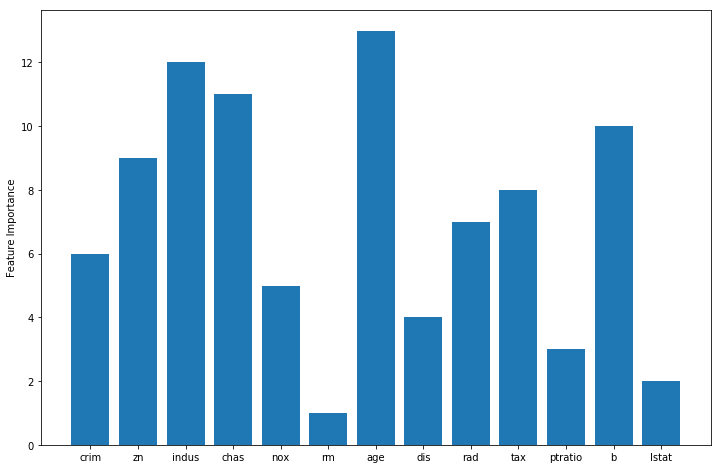

In [62]:
plt.figure(figsize = (12, 8))
plt.bar(X.columns, selector.ranking_)
plt.ylabel('Feature Importance')

In [63]:
scaled_data.shape

(506, 13)

In [64]:
r_squared = []

for x in range(1, 14):
    selector = RFE(linreg, n_features_to_select=x)
    selector = selector.fit(scaled_data, df['medv'])
    r_squared.append(selector.score(scaled_data, df['medv']))

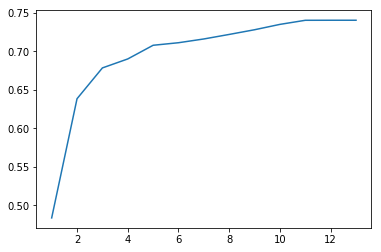

In [65]:
plt.plot(range(1, 14), r_squared)
plt.show()

In [66]:
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(scaled_data, df['medv'])

In [67]:
selector.score(scaled_data, df['medv'])

0.4835254559913343